### IMPORTS

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import nltk
from collections import Counter
from nltk.corpus import stopwords

### GLOBALS

In [3]:
corpus_path = ".\\UNGDC_1946-2023\\TXT"

In [4]:
# Lista com as pastas para cada ano de conferência

list_pastas = []
for root, dirs, files in os.walk(corpus_path):
    for dir in dirs:
        list_pastas.append(dir)

In [5]:
data = []

# Itera sobre cada pasta (ano de conferência)
for pasta in tqdm(list_pastas, desc = "Processando pastas"):
    pasta_path = os.path.join(corpus_path, pasta)
    
    # Itera sobre cada arquivo de texto na pasta
    for arq in os.listdir(pasta_path):
        # Ignora arquivos ocultos
        if not arq.startswith('.'):
            arq_path = os.path.join(pasta_path, arq)

            # Obtém ano e código do país do nome do arquivo
            ano = pasta.split(' - ')[1]
            codigo_pais = arq.split('_')[0]
            
            # Faz a leitura do conteúdo do arquivo
            with open(arq_path, 'r', encoding = 'utf-8') as f:
                discurso = f.read()
            
            # Adiciona o conteúdo do arquivo à lista de discursos
            data.append([ano, codigo_pais, discurso])

# Cria um dataframe da lista de discursos
df = pd.DataFrame(data, columns = ['ano', 'pais', 'texto'])

# df.to_csv('UNGDC_1946-2023.csv', index=False)

print(df)


Processing folders: 100%|██████████| 78/78 [02:12<00:00,  1.70s/it]

        ano pais                                              texto
0      1946  ARG  At the resumption of the first session of the ...
1      1946  AUS  The General Assembly of the United Nations is ...
2      1946  BEL  The\tprincipal organs of the United Nations ha...
3      1946  BLR  As more than a year has elapsed since the Unit...
4      1946  BOL  Coming to this platform where so many distingu...
...     ...  ...                                                ...
10755  2023  WSM  Samoa extends its congratulations and best wis...
10756  2023  YEM  This session of the General Assembly is being ...
10757  2023  ZAF  Seventy-eight years ago. in the aftermath of t...
10758  2023  ZMB  The world today is overcome with the overlappi...
10759  2023  ZWE  I wish to congratulate Mr. Dennis Francis on h...

[10760 rows x 3 columns]


### Histograma do número de caracteres por discurso

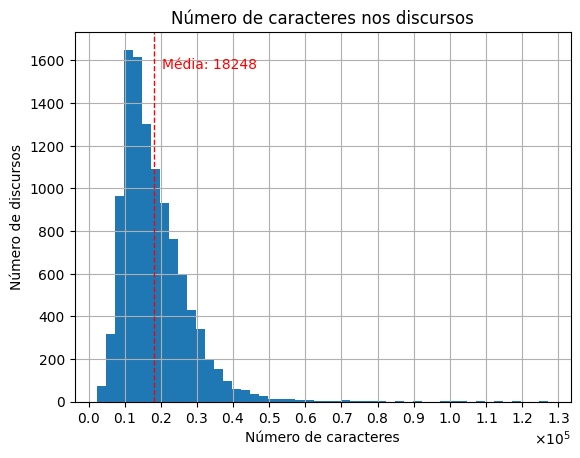

In [16]:
df['n_caracteres_total'] = df['texto'].apply(lambda x: len(x))
df['n_caracteres_total'].hist(bins=50)
plt.xlabel("Número de caracteres")
plt.ylabel("Número de discursos")
plt.title("Número de caracteres nos discursos")

# Adiciona a linha da média
media_caracteres = int(df['n_caracteres_total'].mean())
plt.axvline(media_caracteres, color='r', linestyle = 'dashed', linewidth = 1)
plt.text(media_caracteres + 2000, plt.ylim()[1] * 0.9, f'Média: {media_caracteres}', color = 'r')

# Eixo x em notação científica
plt.ticklabel_format(style = 'scientific', axis = 'x', scilimits = (0,0), useMathText = True)

# Número de ticks no eixo x
plt.locator_params(axis = 'x', nbins = 16)

plt.show()

### Histograma da quantidade de palavras por discurso

MAX: 22003
MIN: 423


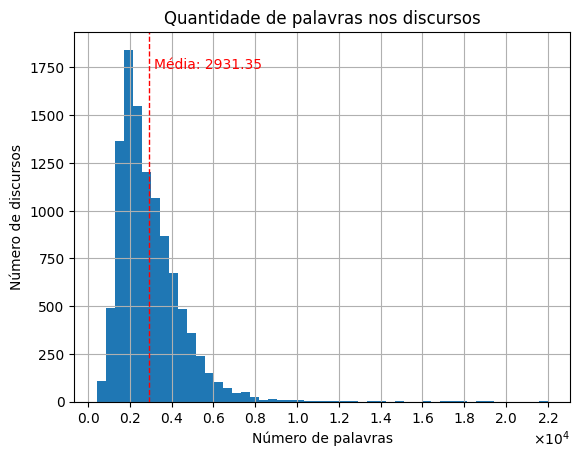

In [49]:
df['n_palavras'] = df['texto'].apply(lambda x: len(x.split()))
df['n_palavras'].hist(bins = 50)
plt.xlabel("Número de palavras")
plt.ylabel("Número de discursos")
plt.title("Quantidade de palavras nos discursos")

# Discurso com mais palavras
print(f"MAX: {df['n_palavras'].max()}")

# Discurso com menos palavras
print(f"MIN: {df['n_palavras'].min()}")

# Adiciona a linha da média
media_palavras = df['n_palavras'].mean()
plt.axvline(media_palavras, color = 'r', linestyle = 'dashed', linewidth = 1)
plt.text(media_palavras + 200, plt.ylim()[1] * 0.9, f'Média: {media_palavras:.2f}', color = 'r')

# Eixo x em notação científica
plt.ticklabel_format(style = 'scientific', axis = 'x', scilimits = (0,0), useMathText = True)

# Mais ticks no eixo x
plt.locator_params(axis = 'x', nbins = 16)

plt.show()

### Histograma do tamanho médio das palavras por discurso

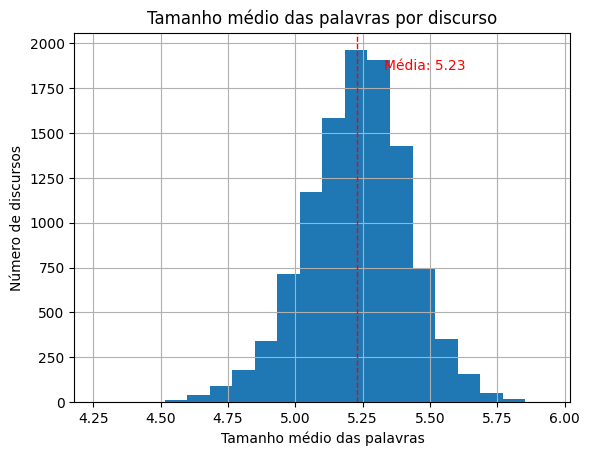

In [35]:
df['tamanho_palavras'] = df['texto'].apply(lambda x: sum(len(p) for p in x.split()) / len(x.split()))
df['tamanho_palavras'].hist(bins = 20)
plt.xlabel("Tamanho médio das palavras")
plt.ylabel("Número de discursos")
plt.title("Tamanho médio das palavras por discurso")

# Adiciona uma linha indicando a média do tamanho das palavras por discurso
media_tamanho_palavras = df['tamanho_palavras'].mean()
plt.axvline(media_tamanho_palavras, color = 'r', linestyle = 'dashed', linewidth = 1)
plt.text(media_tamanho_palavras + 0.1, plt.ylim()[1] * 0.9, f'Média: {media_tamanho_palavras:.2f}', color = 'r')

plt.show()

### Histograma da quantidade de palavras por tamanho de palavra

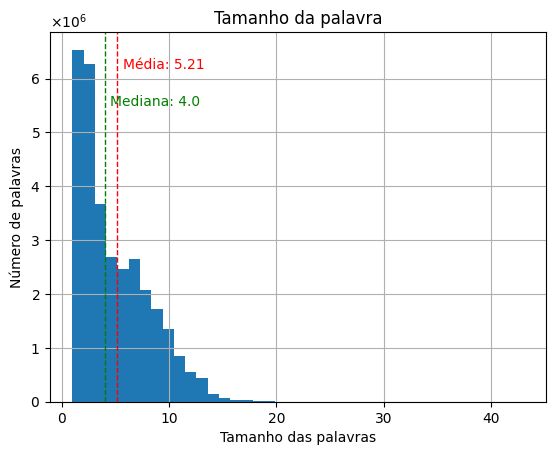

In [30]:
tamanho_palavras = df['texto'].str.split().explode().str.len()
tamanho_palavras.hist(bins = 40)
plt.xlabel("Tamanho das palavras")
plt.ylabel("Número de palavras")
plt.title("Tamanho da palavra")

media_tamanho = tamanho_palavras.mean()
mediana_tamanho = tamanho_palavras.median()
# Linha da média
plt.axvline(media_tamanho, color = 'r', linestyle = 'dashed', linewidth = 1)
plt.text(media_tamanho + 0.5, plt.ylim()[1] * 0.9, f"Média: {media_tamanho:.2f}", color='r')

# Linha da mediana
plt.axvline(mediana_tamanho, color='g', linestyle='dashed', linewidth=1)
plt.text(mediana_tamanho + 0.5, plt.ylim()[1] * 0.8, f"Mediana: {mediana_tamanho}", color='g')

# Eixo y em notação científica
plt.ticklabel_format(style = 'scientific', axis = 'y', scilimits = (0,0), useMathText = True)

plt.show()

### Histograma com a contagem de stopwords em inglês

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ander\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


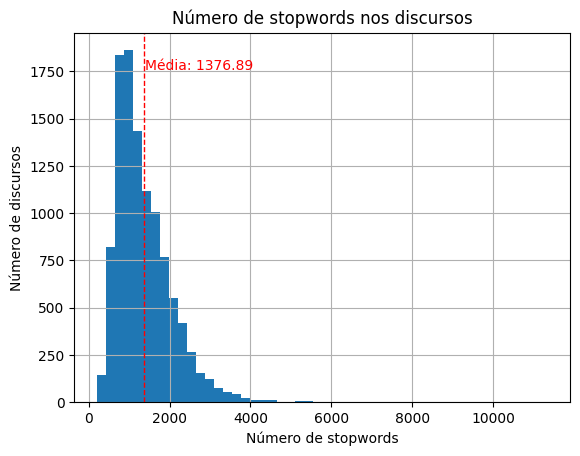

In [31]:
# Utiliza a biblioteca nltk para obter a lista de stopwords em inglês
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

df['n_stopwords'] = df['texto'].apply(lambda x: len([p for p in x.split() if p.lower() in stop_words]))
df['n_stopwords'].hist(bins=50)
plt.xlabel("Número de stopwords")
plt.ylabel("Número de discursos")
plt.title("Número de stopwords nos discursos")

# Adiciona a linha da média
media_stopwords = df['n_stopwords'].mean()
plt.axvline(media_stopwords, color = 'r', linestyle = 'dashed', linewidth = 1)
plt.text(media_stopwords + 10, plt.ylim()[1] * 0.9, f"Média: {media_stopwords:.2f}", color='r')

plt.show()


### Gráfico de barras da frequência das 15 stopwords mais comuns

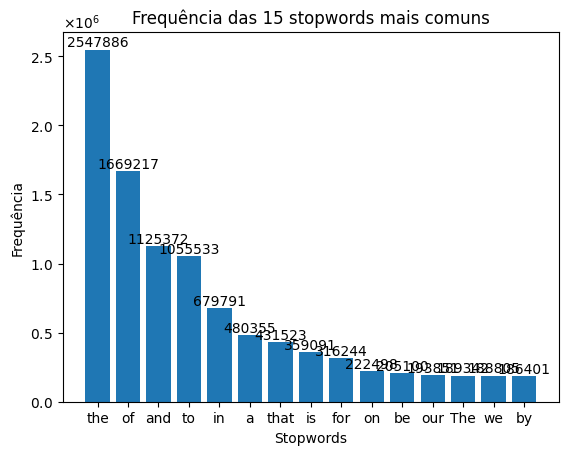

In [27]:
stopwords_freq = Counter([p for p in ' '.join(df['texto']).split() if p.lower() in stop_words])
stopwords_freq = stopwords_freq.most_common(15)

plt.bar([p[0] for p in stopwords_freq], [p[1] for p in stopwords_freq])
plt.xlabel("Stopwords")
plt.ylabel("Frequência")
plt.title("Frequência das 15 stopwords mais comuns")

# Adiciona os valores no topo das barras
for i, freq in enumerate(stopwords_freq):
    plt.text(i, freq[1], freq[1], ha='center', va='bottom')

# Eixo y em notação científica
plt.ticklabel_format(style = 'scientific', axis = 'y', scilimits = (0,0), useMathText = True)

plt.show()

### Gráfico de barras da frequência das 15 palavras mais comuns

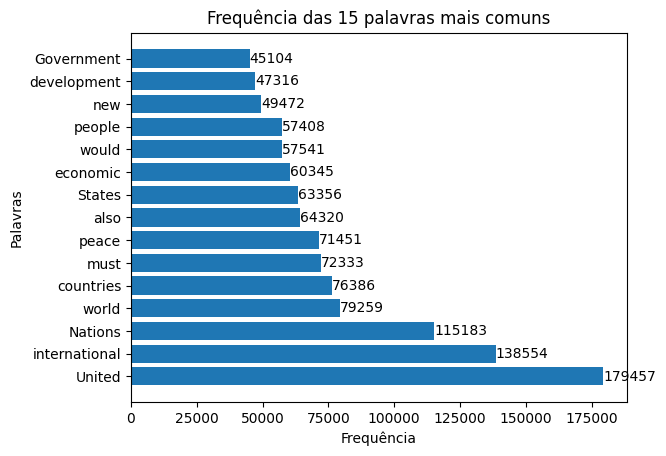

In [32]:
palavras_freq = Counter([p for p in ' '.join(df['texto']).split() if p.lower() not in stop_words])
palavras_freq_mais_comum = palavras_freq.most_common(15)

plt.barh([p[0] for p in palavras_freq_mais_comum], [p[1] for p in palavras_freq_mais_comum])
plt.xlabel("Frequência")
plt.ylabel("Palavras")
plt.title("Frequência das 15 palavras mais comuns")

# Adiciona os valores no final das barras
for i, freq in enumerate(palavras_freq_mais_comum):
    plt.text(freq[1], i, freq[1], ha = 'left', va = 'center')

plt.show()

### Gráfico de barras da frequência das 15 palavras mais comuns excluindo algumas específicas

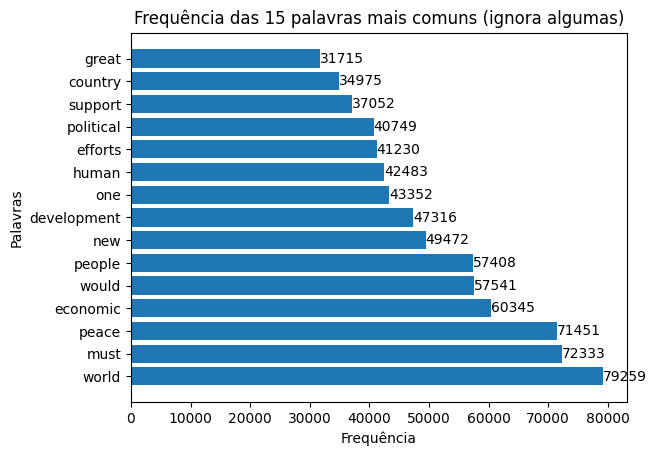

In [26]:
palavras_nao_incluir = [
    'United',
    'Nations',
    'States',
    'Government',
    'international',
    'countries',
    'us',
    'also',
    'Assembly',
    'General',
    '—'
]

palavras_freq = Counter([p for p in ' '.join(df['texto']).split() if p.lower() not in stop_words and p not in palavras_nao_incluir])
palavras_freq_mais_comum = palavras_freq.most_common(15)

plt.barh([p[0] for p in palavras_freq_mais_comum], [p[1] for p in palavras_freq_mais_comum])
plt.xlabel("Frequência")
plt.ylabel("Palavras")
plt.title("Frequência das 15 palavras mais comuns (ignora algumas)")

# Adiciona os valores no final das barras
for i, freq in enumerate(palavras_freq_mais_comum):
    plt.text(freq[1], i, freq[1], ha = 'left', va = 'center')

plt.show()

### Gráfico de barras do número de discursos por país

#### G7

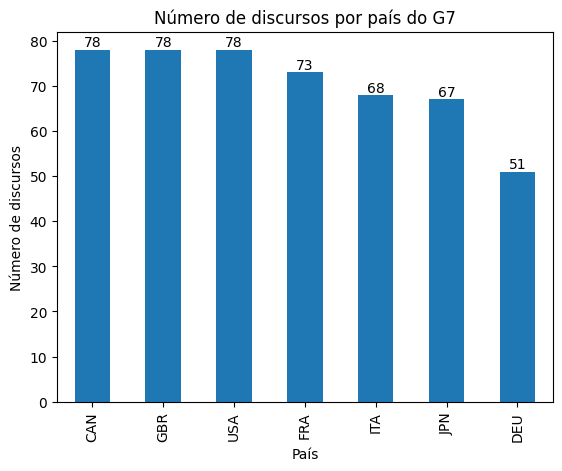

In [39]:
sigla_paises_g7 = ['USA', 'GBR', 'FRA', 'DEU', 'ITA', 'CAN', 'JPN']

df_g7 = df[df['pais'].isin(sigla_paises_g7)]
df_g7['pais'].value_counts().plot(kind = 'bar')
plt.title("Número de discursos por país do G7")

plt.xlabel("País")
plt.ylabel("Número de discursos")

# Adiciona os valores no topo das barras
for i, freq in enumerate(df_g7['pais'].value_counts()):
    plt.text(i, freq, freq, ha = 'center', va = 'bottom')

plt.show()

#### BRICS

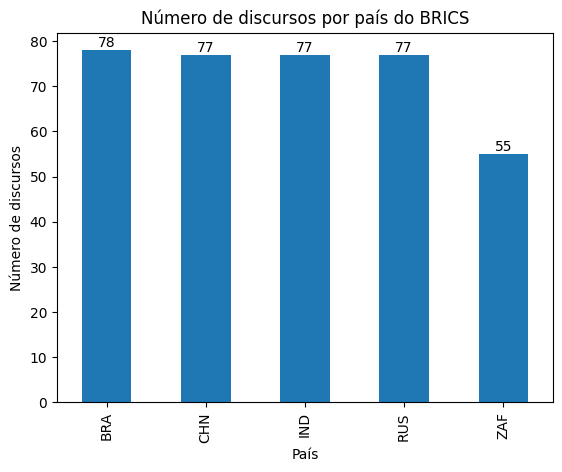

In [43]:
# gráfico de barras com a quantidade de discursos por país do BRICS
sigla_paises_brics = ['BRA', 'RUS', 'IND', 'CHN', 'ZAF']

df_brics = df[df['pais'].isin(sigla_paises_brics)]
df_brics['pais'].value_counts().plot(kind = 'bar')

plt.title("Número de discursos por país do BRICS")
plt.xlabel("País")
plt.ylabel("Número de discursos")

# Adiciona os valores no topo das barras
for i, freq in enumerate(df_brics['pais'].value_counts()):
    plt.text(i, freq, freq, ha = 'center', va = 'bottom')

plt.show()

### Gráfico de barras do número de discursos por ano

#### Período da guerra fria (1946 - 1991)

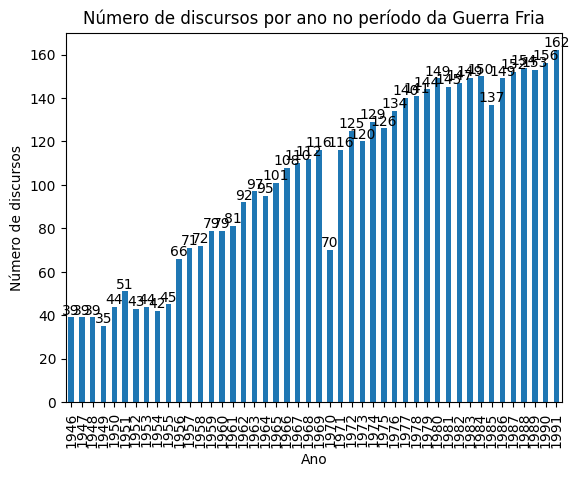

In [41]:
# Gráfico de barras do número de discursos por ano no período da guerra fria
df_guerra_fria = df[df['ano'].between('1946', '1991')]
df_guerra_fria['ano'].value_counts().sort_index().plot(kind = 'bar')
plt.title("Número de discursos por ano no período da Guerra Fria")
plt.xlabel("Ano")
plt.ylabel("Número de discursos")

# Adiciona os valores no topo das barras
for i, freq in enumerate(df_guerra_fria['ano'].value_counts().sort_index()):
    plt.text(i, freq, freq, ha = 'center', va = 'bottom')

plt.show()


#### Período pós-Guerra Fria (1992 - 2023)

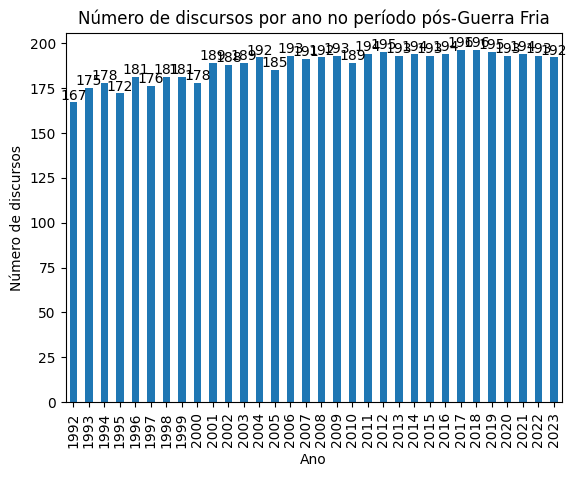

In [42]:
# Gráfico de barras do número de discursos por ano no período pós-guerra fria
df_pos_guerra_fria = df[df['ano'].between('1992', '2023')]
df_pos_guerra_fria['ano'].value_counts().sort_index().plot(kind = 'bar')

plt.title("Número de discursos por ano no período pós-Guerra Fria")
plt.xlabel("Ano")
plt.ylabel("Número de discursos")

# Adiciona os valores no topo das barras
for i, freq in enumerate(df_pos_guerra_fria['ano'].value_counts().sort_index()):
    plt.text(i, freq, freq, ha = 'center', va = 'bottom')

plt.show()